In [4]:
from tictactoe import Game
from random_agent import RandomAgent
import numpy as np
import torch
#import tensorflow as tf
from copy import deepcopy

"""

"""

# The Q-table
Q = {}
S = {}

# Function to choose action based on epsilon-greedy policy
def epsilon_greedy_policy(q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_values))  # Random action
    else:
        return np.argmax(q_values)  # Greedy action

def q_learning_play(game, qtable, states_table):
    possible_states = list()
    # Make hashes of each possible next game state
    for x in range(3):
        for y in range(3):
            #print(f"x: {x} | y: {y} | value: {game.board.squares[x][y]}")
            if game.board.squares[x][y] == 0:
                game_copy = deepcopy(game)
                game_copy.play(x, y)
                possible_states.append((x, y, game_copy.board.calculate_hash()))
    # Get q_values of all the possible next game states from Q table
    # or initialized with 0.5 if the state was never seen before
    q_values = list()
    for state in possible_states:
        state_hash = state[2]
        if state_hash in qtable:
            q_values.append(qtable[state_hash])
        else:
            q_values.append(0.5) # our initial Q values
            qtable[state_hash] = 0.5
    # Use epsilon greedy to make a move
    picked_value = epsilon_greedy_policy(q_values, 0.1)
    states_table[game.board.calculate_hash()] = possible_states
    x, y, _ = possible_states[picked_value]
    return(x, y, qtable, states_table)

def undo_hash(game_hash):
    # Convert the integer hash to a string
    game_hash_str = str(game_hash)
    # Insert spaces to separate the digits
    game_hash_str_spaced = ' '.join(game_hash_str)
    # Convert the string back to a numpy array
    game_hash_array = np.fromstring(game_hash_str_spaced, dtype=int, sep=' ')
    while len(game_hash_array) < 9:
        game_hash_array = np.concatenate(([0], game_hash_array))
    # Reshape the numpy array to its original shape (3x3)
    original_shape = (3, 3)
    original_array = np.reshape(game_hash_array, original_shape)
    return original_array

def extract_max_possible_q(state, Q):
    squares = undo_hash(state)
    # Setting up the game from the given state
    game = Game()
    game.board.squares = squares
    game.turn = np.sum(game.board.squares != 0)
    # Explore possible next states
    max_Q = 0
    for x in range(3):
        for y in range(3):
            if game.board.squares[x][y] == 0:
                game_copy = deepcopy(game)
                game_copy.play(x, y)
                possible_state = game_copy.board.calculate_hash()
                if possible_state in Q:
                    if Q[possible_state] > max_Q:
                        max_Q = Q[possible_state]
                else:
                    Q[possible_state] = 0.5
                    if Q[possible_state] > max_Q:
                        max_Q = Q[possible_state]
    return max_Q

# 1. Keep track of all the selected states
# 2. The very last state gets the player reward from the game as its value
# 3. Step backwards to the 2nd last state. Now identify, from here, of all the next possible states, the
#    highest Q-value (make fn for this). This is max_a Q(S', a).
# 4. Plug that value into the Q update formula:
#    - (1 - learning rate) * the old Q + learning rate * disc fac * max_a Q(S', a)
# 5. Repeat backwards through all the states that were selected in the game

# put all this inside 100 games e.g.
###############################################################################

Q = {}
rewards = list()
gamma = 0.95
alpha = 0.95

for i in range(10000):
    print(f"Game {i}")
    random_agent = RandomAgent()
    visited_states = list()
    game = Game()
    while not game.done:
        # Q-agent is P1
        x, y, Q, S = q_learning_play(game, Q, S)
        game.play(x, y)
        # game.board.show()
        visited_state = game.board.calculate_hash()
        visited_states.append(visited_state)
        if game.done:
            break
        # Random Agent is P2
        random_agent.play(game)
        #print("Random agent turn:")
        #game.board.show()
    # Keep track of q-agent's rewards for our own monitoring
    rewards.append(game.p1_reward)
    # Update Q table by working backwards through visited states
    rev_states = visited_states[::-1]
    for i in range(len(rev_states)):
        state = rev_states[i]
        if i == 0:
            Q[state] = game.p1_reward
        else:
            max_next_q = extract_max_possible_q(state, Q)
            Q[state] = ((1 - gamma) * Q[state]) + gamma * alpha * max_next_q

Q2 = {}
# Check Q-agent performance vs. random agent after 100 games
evaluation_rewards = list()
for i in range(100):
    random_agent = RandomAgent()
    game = Game()
    while not game.done:
        # Q-agent is P1
        x, y, Q2, S = q_learning_play(game, Q2, S)
        game.play(x, y)
        # game.board.show()
        if game.done:
            break
        # Random Agent is P2
        random_agent.play(game)
    # Keep track of q-agent's rewards for our own monitoring
    evaluation_rewards.append(game.p1_reward)
np.mean(evaluation_rewards)

Game 0
Game 1
Game 2
Game 3
Game 4
Game 5
Game 6
Game 7
Game 8
Game 9
Game 10
Game 11
Game 12
Game 13
Game 14
Game 15
Game 16
Game 17
Game 18
Game 19
Game 20
Game 21
Game 22
Game 23
Game 24
Game 25
Game 26
Game 27
Game 28
Game 29
Game 30
Game 31
Game 32
Game 33
Game 34
Game 35
Game 36
Game 37
Game 38
Game 39
Game 40
Game 41
Game 42
Game 43
Game 44
Game 45
Game 46
Game 47
Game 48
Game 49
Game 50
Game 51
Game 52
Game 53
Game 54
Game 55
Game 56
Game 57
Game 58
Game 59
Game 60
Game 61
Game 62
Game 63
Game 64
Game 65
Game 66
Game 67
Game 68
Game 69
Game 70
Game 71
Game 72
Game 73
Game 74
Game 75
Game 76
Game 77
Game 78
Game 79
Game 80
Game 81
Game 82
Game 83
Game 84
Game 85
Game 86
Game 87
Game 88
Game 89
Game 90
Game 91
Game 92
Game 93
Game 94
Game 95
Game 96
Game 97
Game 98
Game 99
Game 100
Game 101
Game 102
Game 103
Game 104
Game 105
Game 106
Game 107
Game 108
Game 109
Game 110
Game 111
Game 112
Game 113
Game 114
Game 115
Game 116
Game 117
Game 118
Game 119
Game 120
Game 121
Game 122
Gam

KeyboardInterrupt: 

c:\Python\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


win % :  57%
tie % :  14%
lose % :  29%


C:\Users\liyux\AppData\Local\Temp\ipykernel_22708\1227009538.py:186: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  training_data.append([board_conversion_to_2x9(squares).cuda(), torch.tensor(theoretical_Q, dtype=torch.float).cuda()])


win % :  63%
tie % :  11%
lose % :  26%
win % :  52%
tie % :  14%
lose % :  34%
win % :  62%
tie % :  10%
lose % :  28%
win % :  69%
tie % :  6%
lose % :  25%
win % :  73%
tie % :  4%
lose % :  23%
win % :  76%
tie % :  7%
lose % :  17%
win % :  65%
tie % :  6%
lose % :  29%
win % :  59%
tie % :  7%
lose % :  34%
win % :  77%
tie % :  10%
lose % :  13%


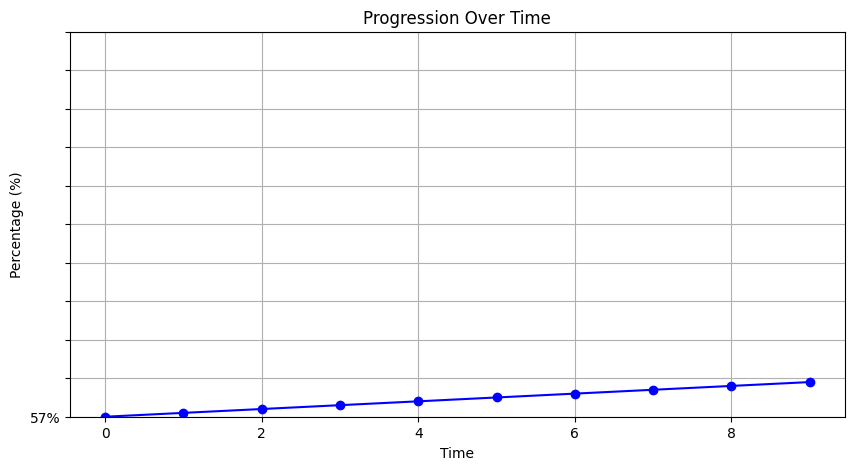

In [12]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from tictactoe import Board, Game
from random_agent import RandomAgent
import numpy as np 
import matplotlib.pyplot as plt 

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

def board_conversion_to_2x9(squares):
    x = []
    o = []

    for i in range(len(squares)):
        for j in range(len(squares[i])):
            if squares[i][j] == 1:
                x.append(1)
                o.append(0)
            elif squares[i][j] == 2:
                x.append(0)
                o.append(1)
            else:
                x.append(0)
                o.append(0)
    
    return torch.tensor(x + o).float()

class TicTacToeNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(nn.Linear(18, 18), nn.ReLU(), nn.Linear(18, 18), nn.ReLU(), nn.Linear(18, 18), nn.ReLU(), nn.Linear(18, 18), nn.ReLU(), nn.Linear(18, 1))

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        # x = torch.relu(self.fc1(x))  # Apply ReLU activation to the output of the first layer
        # x = self.fc2(x)              # Apply the second linear transformation
        return logits
    
model = TicTacToeNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def epsilon_greedy_policy(q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(len(q_values))  # Random action
    else:
        return np.argmax(q_values)  # Greedy action

def nn_play(game, model):
    possible_states = list()
    # Make hashes of each possible next game state
    for x in range(3):
        for y in range(3):
            #print(f"x: {x} | y: {y} | value: {game.board.squares[x][y]}")
            if game.board.squares[x][y] == 0:
                game_copy = deepcopy(game)
                game_copy.play(x, y)
                possible_states.append((x, y, game_copy.board.squares))
    # Get q_values of all the possible next game states from Q table
    # or initialized with 0.5 if the state was never seen before
    q_values = [model(board_conversion_to_2x9(possible_state[2]).cuda()).detach().cpu().numpy() for possible_state in possible_states]
    # Use epsilon greedy to make a move
    picked_value = epsilon_greedy_policy(q_values, 0.1)
    x, y, _ = possible_states[picked_value]
    return(x, y, q_values[picked_value])

# random_agent = RandomAgent()
# visited_states = []
# game = Game()
# while not game.done:
#     x, y, Q = nn_play(game, model)
#     game.play(x, y)
#     visited_state = game.board.squares
#     visited_states.append((visited_state, Q))
#     if game.done:
#         break
#     random_agent.play(game)

# print(visited_states)
# print(game.board.show())

# def train(data, model, loss_fn, optimizer):
#     model.train()
#     for i in something:
#         X = board_conversion_to_2x9(board.squares)

#         # Compute prediction error
#         move_qvalues = model(X)
#         move_we_pick = epsilon_greedy_policy(move_qvalues, .9)
#         # Somehow keep track of move we made / state we picked
#         # repeat all this for a whole game
#         # calculate Q values for all the states we visited based on the Q value formula
#         loss = loss_fn(move_qvalues, Q_vals_we_calc_from_formula)

#         # Backpropagation
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()

#         if batch % 100 == 0:
#             loss, current = loss.item(), (batch + 1) * len(X)
#             print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

criterion = torch.nn.MSELoss()

def train_data(data, model):
    num_epochs = 5

    for epoch in range(num_epochs):
        total_loss = 0
        for squares, q in data:
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            output = model(squares)
            
            # Compute the loss
            loss = criterion(output, q)
            
            # Backward pass
            loss.backward()
            
            # Update the weights
            optimizer.step()
            
            total_loss += loss.item()        

def extract_max_possible_q(squares, model):
    # Setting up the game from the given state
    game = Game()
    game.board.squares = squares
    game.turn = np.sum(game.board.squares != 0)
    # Explore possible next states
    max_Q = 0
    for x in range(3):
        for y in range(3):
            if game.board.squares[x][y] == 0:
                game_copy = deepcopy(game)
                game_copy.play(x, y)
                Q_possible_state = model(board_conversion_to_2x9(squares).cuda())
                if Q_possible_state > max_Q:
                    max_Q = Q_possible_state
    return max_Q

training_data = []
rewards = []

win_perc = []

for i in range(1001):
    # print(f"Game {i}")
    random_agent = RandomAgent()
    visited_states = list()
    game = Game()
    while not game.done:
        x, y, Q = nn_play(game, model)
        game.play(x, y)
        visited_state = deepcopy(game.board.squares)
        visited_states.append((visited_state, Q))
        if game.done:
            break
        random_agent.play(game)
    # Keep track of q-agent's rewards for our own monitoring
    rewards.append(game.p1_reward)
    # Update Q table by working backwards through visited states
    rev_states = visited_states[::-1]
    for j in range(len(rev_states)):
        state = rev_states[j]
        squares = state[0]
        if j == 0:
            theoretical_Q = game.p1_reward
        else:
            max_next_q = extract_max_possible_q(squares, model)
            theoretical_Q = ((1 - gamma) * theoretical_Q) + gamma * alpha * max_next_q
        training_data.append([board_conversion_to_2x9(squares).cuda(), torch.tensor(theoretical_Q, dtype=torch.float).cuda()])

    if i % 100 == 0 and i != 0:
        # train the training data for the model
        # print(training_data)
        train_data(training_data, model)

        win_count = 0
        tie_count = 0
        lose_count = 0

        recent_rewards = rewards[-100:]
        for reward in recent_rewards:
            if reward == 1:
                win_count += 1
            elif reward == 0.5:
                tie_count += 1
            else:
                lose_count += 1

        win_perc.append(win_count / 100)

        print("win % : ", format(win_count / 100, ".0%"))
        print("tie % : ", format(tie_count / 100, ".0%"))
        print("lose % : ", format(lose_count / 100, ".0%"))

        training_data = []

win_numbers = [int(item.strip('%')) for item in win_perc]

# data to be plotted
x = np.arange(0, len(win_numbers))
 
# plotting
plt.plot(x, win_numbers)
plt.show()

[57, 63, 52, 62, 69, 73, 76, 65, 59, 77]


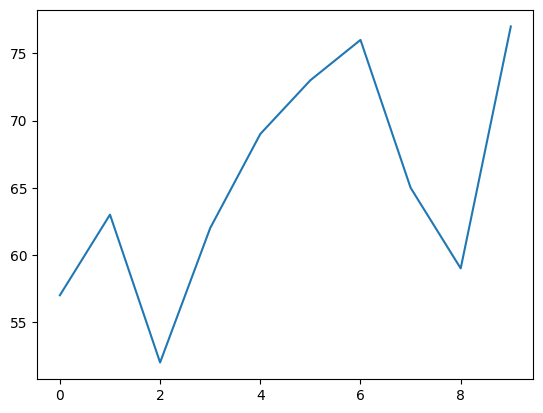